In [3]:
import pandas as pd

#Мы рассмотрим набор данных об эволюции человека, чтобы более четче понять связь развития прямохождения с иными факторами, такими как местообитание, размер черепной коробки или диета.

In [4]:
evl = pd.read_csv('../data/Evolution_DataSets.csv')
evl

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,...,biped,Arms,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
0,hominino Orrorin tugenencin,6.041124,Africa,oriental,Kenya,forest,144.51410,110.24323,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
1,hominino Ardipithecus ramidus / kabadda,4.383910,Africa,oriental,Ethiopia,mixed,293.96021,107.69018,small,conical,...,high probability,climbing,climbing,soft fruits,medium-high,wide,no,old,no,light
2,Australopithecus Afarensis,3.749413,Africa,oriental,Kenya,mixed,264.79849,123.76644,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
3,Australopithecus Anamensis,4.595606,Africa,oriental,Kenya,forest-gallery,403.28047,111.40831,big,U shape,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light
4,Australopithecus Africanus,3.614060,Africa,south,South Africa,forest-gallery,679.15233,111.59004,small,conical,...,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,Australopithecus Africanus,3.354085,Africa,south,South Africa,forest-gallery,676.92547,112.88961,small,conical,...,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light
11996,Australopithecus Africanus,3.969730,Africa,south,South Africa,forest-gallery,560.41705,105.13137,small,conical,...,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light
11997,Homo Floresiensis,0.213857,Asia,oriental,Indonesia,peninsular,222.91130,95.29501,small,U shape,...,modern,climbing,walk,omnivore,medium-high,wide,no,mixed,no,light
11998,Paranthropus Aethiopicus,2.859186,Africa,oriental,Kenya,forest-savanna,466.86762,101.01866,megadony,V shape,...,yes,climbing,climbing,hard fruits,high,wide,no,old,no,robust


#проанализируем саму структуру данных, кол-во строк и столбцов.

In [5]:
evl.shape

(12000, 28)

In [24]:
print("Столбцы")
print(evl.columns.tolist())

Столбцы
['Genus_&_Specie', 'Time', 'Location', 'Zone', 'Current_Country', 'Habitat', 'Cranial_Capacity', 'Height', 'Incisor_Size', 'Jaw_Shape', 'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position', 'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type', 'biped', 'Arms', 'Foots', 'Diet', 'Sexual_Dimorphism', 'Hip', 'Vertical_Front', 'Anatomy', 'Migrated', 'Skeleton', 'Time_Period']


#важно сразу определить наличие пропущенных значений, перед тем как подвергать данные анализу

In [6]:
print(evl.isnull().sum())

Genus_&_Specie             0
Time                       0
Location                   0
Zone                       0
Current_Country            0
Habitat                    0
Cranial_Capacity           0
Height                     0
Incisor_Size               0
Jaw_Shape                  0
Torus_Supraorbital         0
Prognathism                0
Foramen_Mágnum_Position    0
Canine Size                0
Canines_Shape              0
Tooth_Enamel               0
Tecno                      0
Tecno_type                 0
biped                      0
Arms                       0
Foots                      0
Diet                       0
Sexual_Dimorphism          0
Hip                        0
Vertical_Front             0
Anatomy                    0
Migrated                   0
Skeleton                   0
dtype: int64


In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

#у нас есть 3 числовых параметра: время, объем черепной коробки и рост, посмотроим для них гистограммы для оценки распределения

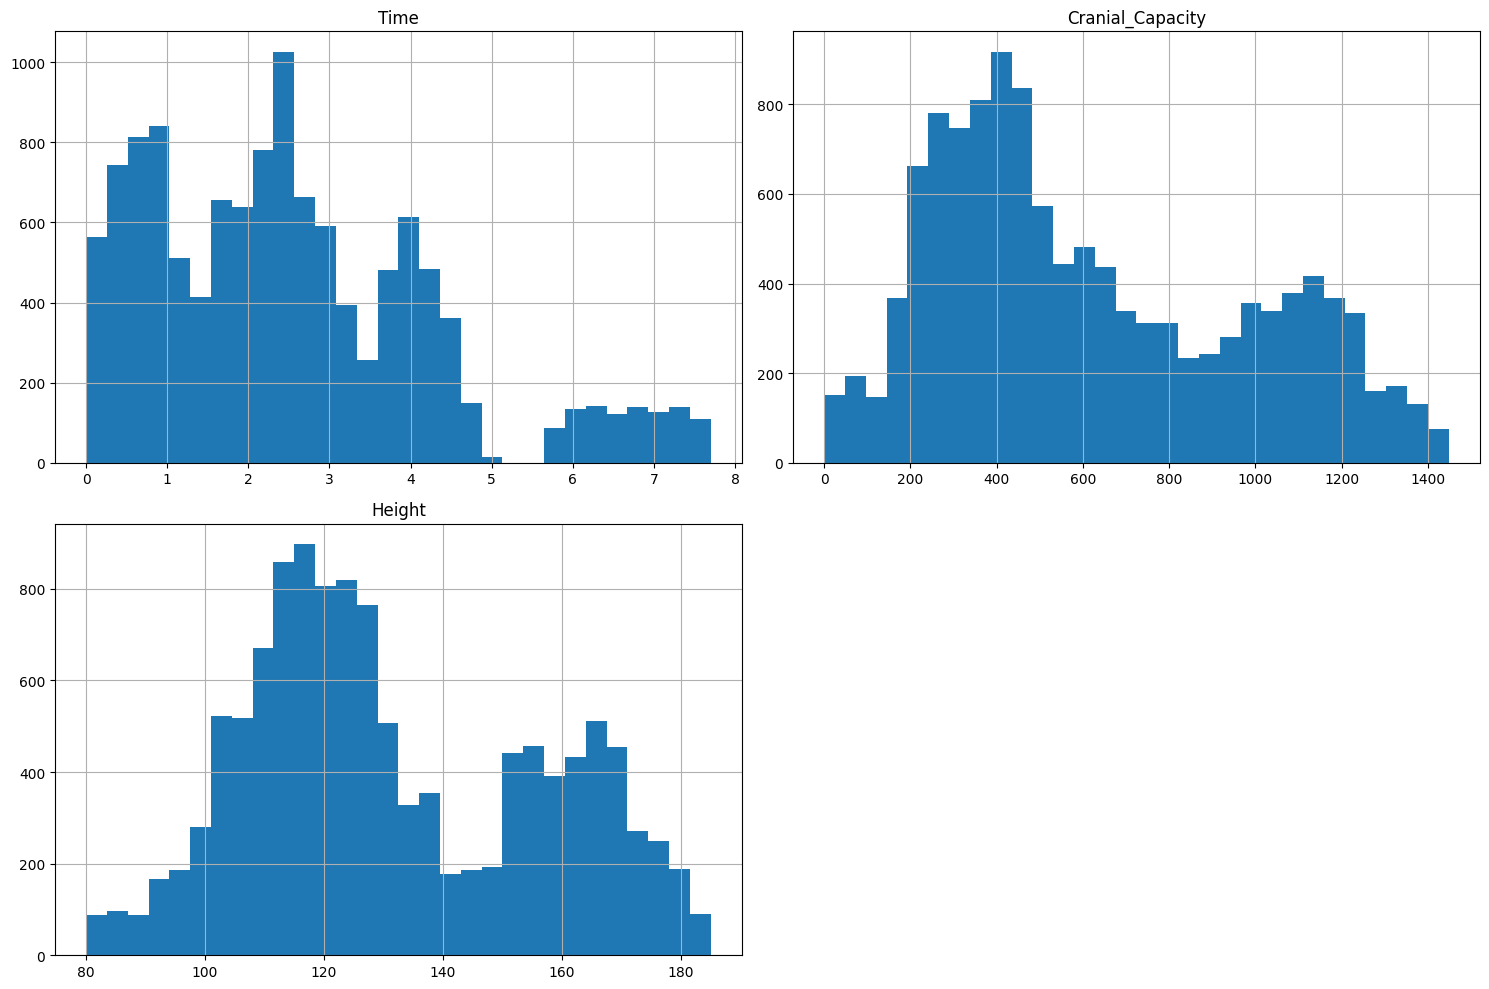

In [13]:
evl.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

#во всех 3х случаях данные распределены ненормально. Теперь посмотрим связано ли время существования каждого отдельного гоминида и размер черепа, построим боксплоты и найдем корреляцию между этими признаками.

Так как время непрерывная переменная, разобъем на 5 периодов

In [22]:
evl['Time_Period'] = pd.cut(evl['Time'], bins=5)

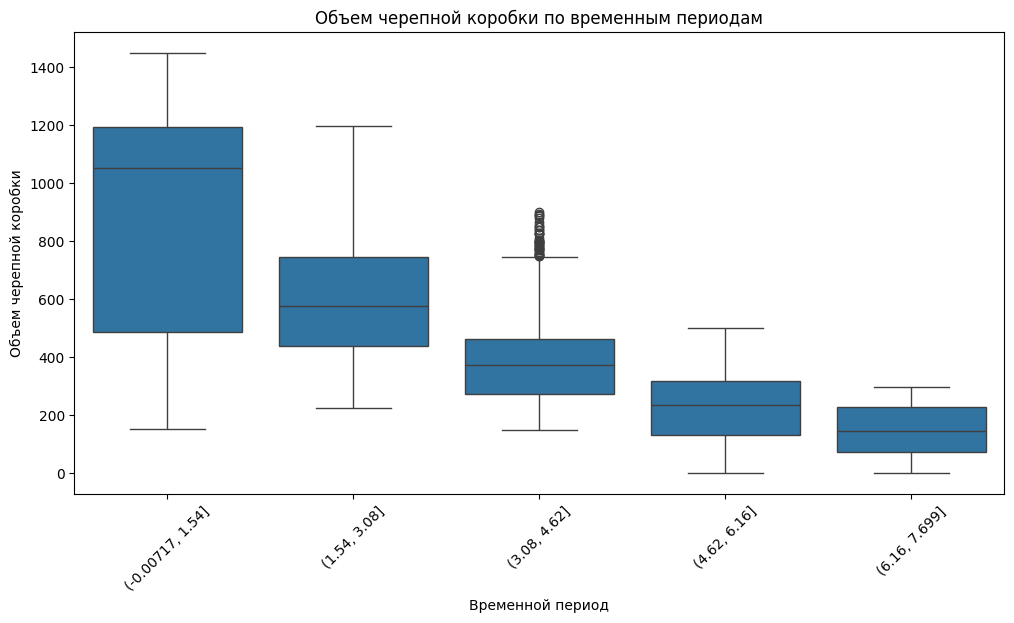

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Time_Period', y='Cranial_Capacity', data=evl)
plt.title('Объем черепной коробки по временным периодам')
plt.xlabel('Временной период')
plt.ylabel('Объем черепной коробки')
plt.xticks(rotation=45)
plt.show()

Как мы видим исходя из графика, у нас менялся не только объем черепной коробки в целом, но и диапазон этого объема. При этом чем дольше существовал гоминид, тем меньше был объем черепной коробки.

In [44]:
correlation = evl['Cranial_Capacity'].corr(evl['Height'])

print(f"Корреляция между объемом черепа и ростом: {correlation:.3f}")

Корреляция между объемом черепа и ростом: 0.846


Мы посмотрели корреляцию между объемом черепа и ростом. Коррреляция в лиапазоне от 0,7 о 1, что говорит что связь сильная положительная, чем больше рост, тем больше черепная коробка. Визуализируем диаграммой рассеивания.

In [52]:
import numpy as np 

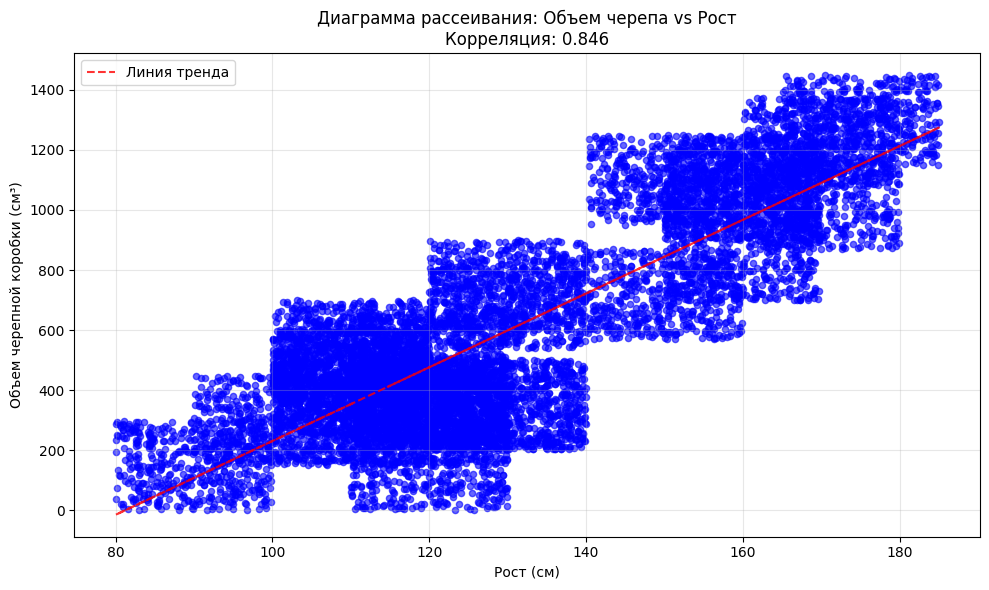

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(evl['Height'], evl['Cranial_Capacity'], 
           alpha=0.6, s=20, color='blue')  # s=20 - маленькие точки

plt.xlabel('Рост (см)')
plt.ylabel('Объем черепной коробки (см³)')
plt.title(f'Диаграмма рассеивания: Объем черепа vs Рост\nКорреляция: {correlation:.3f}')
plt.grid(True, alpha=0.3)
z = np.polyfit(evl['Height'], evl['Cranial_Capacity'], 1)
p = np.poly1d(z)
plt.plot(evl['Height'], p(evl['Height']), "r--", alpha=0.8, linewidth=1.5, label='Линия тренда')
plt.legend()

plt.tight_layout()
plt.show()


Посмотрим средние значения объема черепа по местам обитания

In [31]:
means = evl.groupby('Location')['Cranial_Capacity'].mean()
print("\nСредний объем черепа по местам обитания:")
for location, mean_volume in means.items():
    print(f"{location}: {mean_volume:.1f} см³")


Средний объем черепа по местам обитания:
Africa: 518.0 см³
Asia : 684.3 см³
Europa: 1142.3 см³
